In [2]:
import numpy as np
import pandas as pd
import sys
import sqlite3

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('plotting.mplstyle')

In [3]:
import glob
import os

In [76]:
mycolors = ["#332288", "#117733", "#44AA99", "#88CCEE", "#DDCC77", "#CC6677", "#AA4499", "#882255"]

In [4]:
rows = ['NG', '5', '15', '1', '2']

In [ ]:
UOx
Total UOx
AP UOx
Total AP UOx
Xe100h
Total Xe100h
Xe100l
Total Xe100l
MMRh
Total MMRh
MMRl
Total MMRl

In [59]:
fuels = ['UOx', 'Total UOx', 'AP UOx', 'Total AP UOx', 'Xe100h', 'Total Xe100h', 'MMRh', 'Total MMRh']
metrics = ['fresh','used','swu','reactors']
fuel_nums = ['one_fuel', 'multi_fuel']
schemes = ['greedy', 'random', 'rand_greed', 'rand_greed_one']

In [25]:
fuels = ['UOx', 'Total UOx', 'AP UOx', 'Total AP UOx', 'Xe100h', 'Total Xe100h', 'MMRh', 'Total MMRh', 'Xe100l', 'Total Xe100l', 'MMRl', 'Total MMRl']

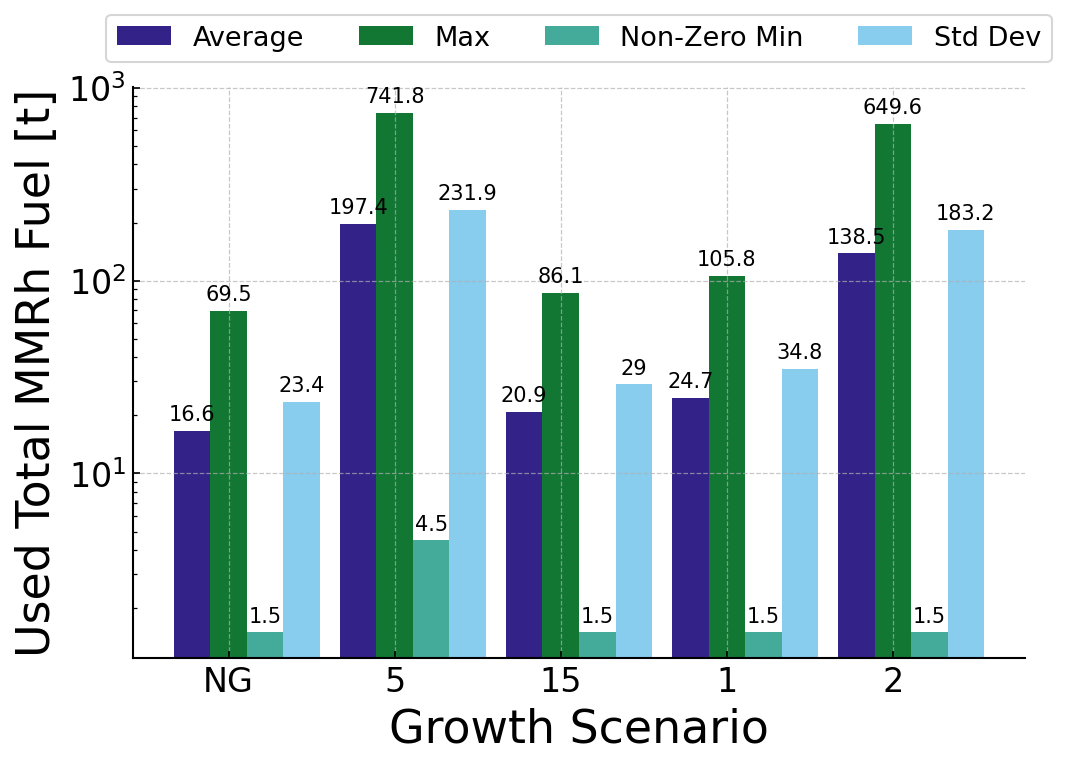

In [75]:
fuel_num = fuel_nums[0]
scheme = schemes[1]
metric = metrics[1]
fuel = fuels[7]


avg_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_avg_calcs.csv')
max_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_max_calcs.csv')
min_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_min_calcs.csv')
std_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_stan_dev_calcs.csv')

min_df

collated = {
    'Average': (avg_df[f'{fuel}_{metric}']/1000).round(1),
    'Max': (max_df[f'{fuel}_{metric}'].astype(int)/1000).round(1),
    'Non-Zero Min': (min_df[f'{fuel}_{metric}'].astype(int)/1000).round(1),
    'Std Dev': (std_df[f'{fuel}_{metric}'].astype(int)/1000).round(1),
}

x = np.arange(len(rows))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in collated.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
if metric == 'fresh' or metric == 'used':
    ax.set_ylabel(f'{metric.capitalize()} {fuel} Fuel [t]')
elif metric == 'swu':
    ax.set_ylabel(f'{metric.upper()} {fuel} Fuel [kg SWU]')
elif metric == 'reactors':
    ax.set_ylabel(f'{metric.capitalize()} {fuel} Fuel [#]')
ax.set_xlabel('Growth Scenario')
ax.set_xticks(x + width, rows)
ax.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.15))
# ax.set_ylim(0, 300)

plt.yscale('log')

plt.savefig(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_{fuel}_calcs.pdf')

In [22]:
fuel_num = 'multi_fuel'
scheme = 'rand_greed_one'

for metric in metrics:
    if metric == 'fresh' or metric == 'used':
        fuels = ['UOx', 'Total UOx', 'AP UOx', 'Total AP UOx', 'Xe100h', 'Total Xe100h', 'MMRh', 'Total MMRh', 'Xe100l', 'Total Xe100l', 'MMRl', 'Total MMRl']
    elif metric == 'swu':
        fuels = ['UOx SWU', 'Total UOx SWU', 'AP UOx SWU', 'Total AP UOx SWU', 'Xe100h SWU', 'Total Xe100h SWU', 'MMRh SWU', 'Total MMRh SWU', 'Xe100l SWU', 'Total Xe100l SWU', 'MMRl SWU', 'Total MMRl SWU']
    elif metric == 'reactors':
        fuels = ['LWRs', 'Total LWRs', 'AP1000', 'Total AP1000', 'Xe100h', 'Total Xe100h', 'MMRh', 'Total MMRh', 'Xe100l', 'Total Xe100l', 'MMRl', 'Total MMRl']
    for fuel in fuels:
        avg_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_avg_calcs.csv')
        max_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_max_calcs.csv')
        min_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_min_calcs.csv')
        std_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_stan_dev_calcs.csv')

        min_df

        collated = {
            'Average': (avg_df[f'{fuel}_{metric}']/1000).round(1),
            'Max': (max_df[f'{fuel}_{metric}'].astype(int)/1000).round(1),
            'Non-Zero Min': (min_df[f'{fuel}_{metric}'].astype(int)/1000).round(1),
            'Std Dev': (std_df[f'{fuel}_{metric}'].astype(int)/1000).round(1),
        }

        x = np.arange(len(rows))  # the label locations
        width = 0.22  # the width of the bars
        multiplier = 0

        fig, ax = plt.subplots(layout='constrained')

        for attribute, measurement in collated.items():
            offset = width * multiplier
            rects = ax.bar(x + offset, measurement, width, label=attribute)
            ax.bar_label(rects, padding=3)
            multiplier += 1

        # Add some text for labels, title and custom x-axis tick labels, etc.
        if metric == 'fresh' or metric == 'used':
            ax.set_ylabel(f'{metric.capitalize()} {fuel} Fuel [t]')
        elif metric == 'swu':
            ax.set_ylabel(f'{metric.upper()} {fuel} Fuel [kg SWU]')
        elif metric == 'reactors':
            ax.set_ylabel(f'{metric.capitalize()} {fuel} Fuel [#]')
        ax.set_xlabel('Growth Scenario')
        ax.set_xticks(x + width, rows)
        ax.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.15))
        # ax.set_ylim(0, 300)

        plt.yscale('log')

        plt.savefig(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_{fuel}_calcs.pdf')

FileNotFoundError: [Errno 2] No such file or directory: '/../../../../../../../media/nsryan/Elements/scenes/analysis/fresh/multi_fuel_rand_greed_one_fresh_avg_calcs.csv'

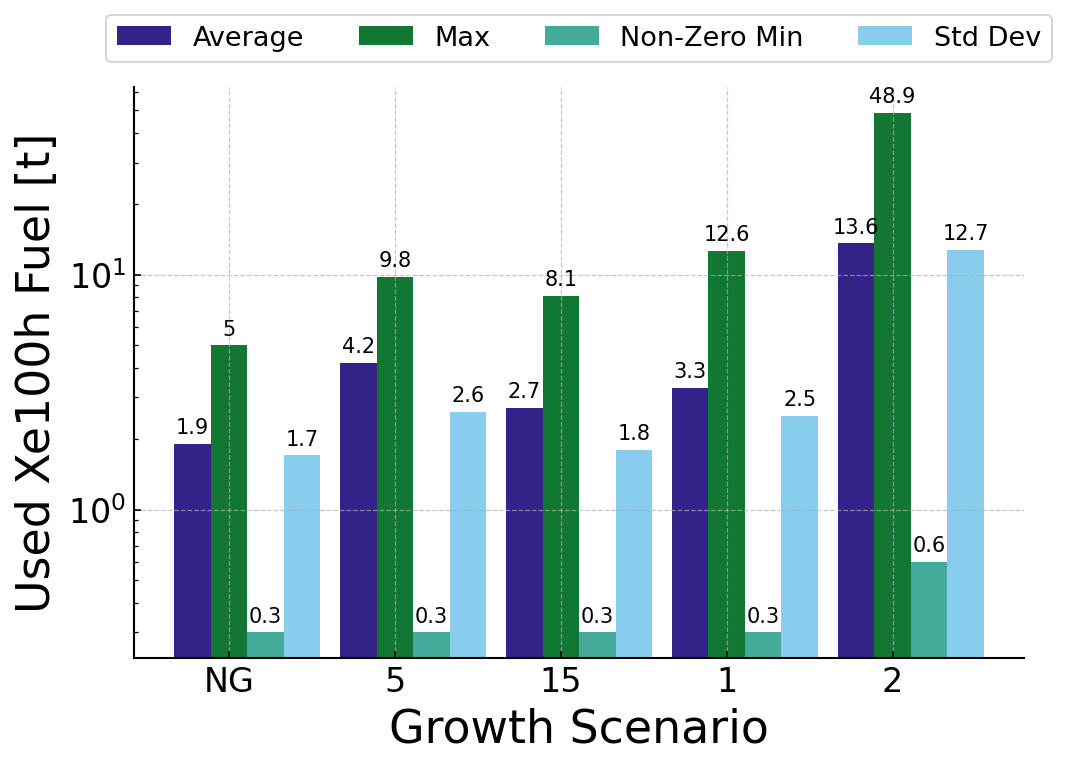

In [ ]:

metric = 'used'

avg_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_avg_calcs.csv')
max_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_max_calcs.csv')
min_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_min_calcs.csv')
std_df = pd.read_csv(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_stan_dev_calcs.csv')

collated = {
    'Average': (avg_df[f'{fuel}_{metric}']/1000).round(1),
    'Max': (max_df[f'{fuel}_{metric}'].astype(int)/1000).round(1),
    'Non-Zero Min': (min_df[f'{fuel}_{metric}'].astype(int)/1000).round(1),
    'Std Dev': (std_df[f'{fuel}_{metric}'].astype(int)/1000).round(1),
}

x = np.arange(len(rows))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in collated.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(f'{metric.capitalize()} {fuel} Fuel [t]')
ax.set_xlabel('Growth Scenario')
ax.set_xticks(x + width, rows)
ax.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.15))
# ax.set_ylim(0, 300)

plt.yscale('log')

plt.savefig(f'/../../../../../../../media/nsryan/Elements/scenes/analysis/{metric}/{fuel_num}_{scheme}_{metric}_{fuel}_calcs.pdf')

In [6]:
min_df

,Unnamed: 0,Year_fresh,UOx_fresh,Total UOx_fresh,AP UOx_fresh,Total AP UOx_fresh,Xe100h_fresh,Total Xe100h_fresh,Xe100l_fresh,Total Xe100l_fresh,MMRh_fresh,Total MMRh_fresh,MMRl_fresh,Total MMRl_fresh
0,ng,2029.0,34190.871369,1.311066e+08,34190.871369,164970.954357,3071.64,18429.84,NaN,NaN,3021.572,9064.716,NaN,NaN
1,5,2029.0,34190.871369,1.311066e+08,34190.871369,82485.477178,279.24,1675.44,NaN,NaN,1510.786,22661.790,NaN,NaN
2,15,2029.0,34190.871369,1.311066e+08,68381.742739,164970.954357,1396.20,8377.20,NaN,NaN,1510.786,16618.646,NaN,NaN
3,1,2029.0,34190.871369,1.311066e+08,34190.871369,164970.954357,3071.64,18429.84,NaN,NaN,3021.572,9064.716,NaN,NaN
4,2,2029.0,34190.871369,1.311066e+08,68381.742739,164970.954357,279.24,20105.28,NaN,NaN,1510.786,7553.930,NaN,NaN
